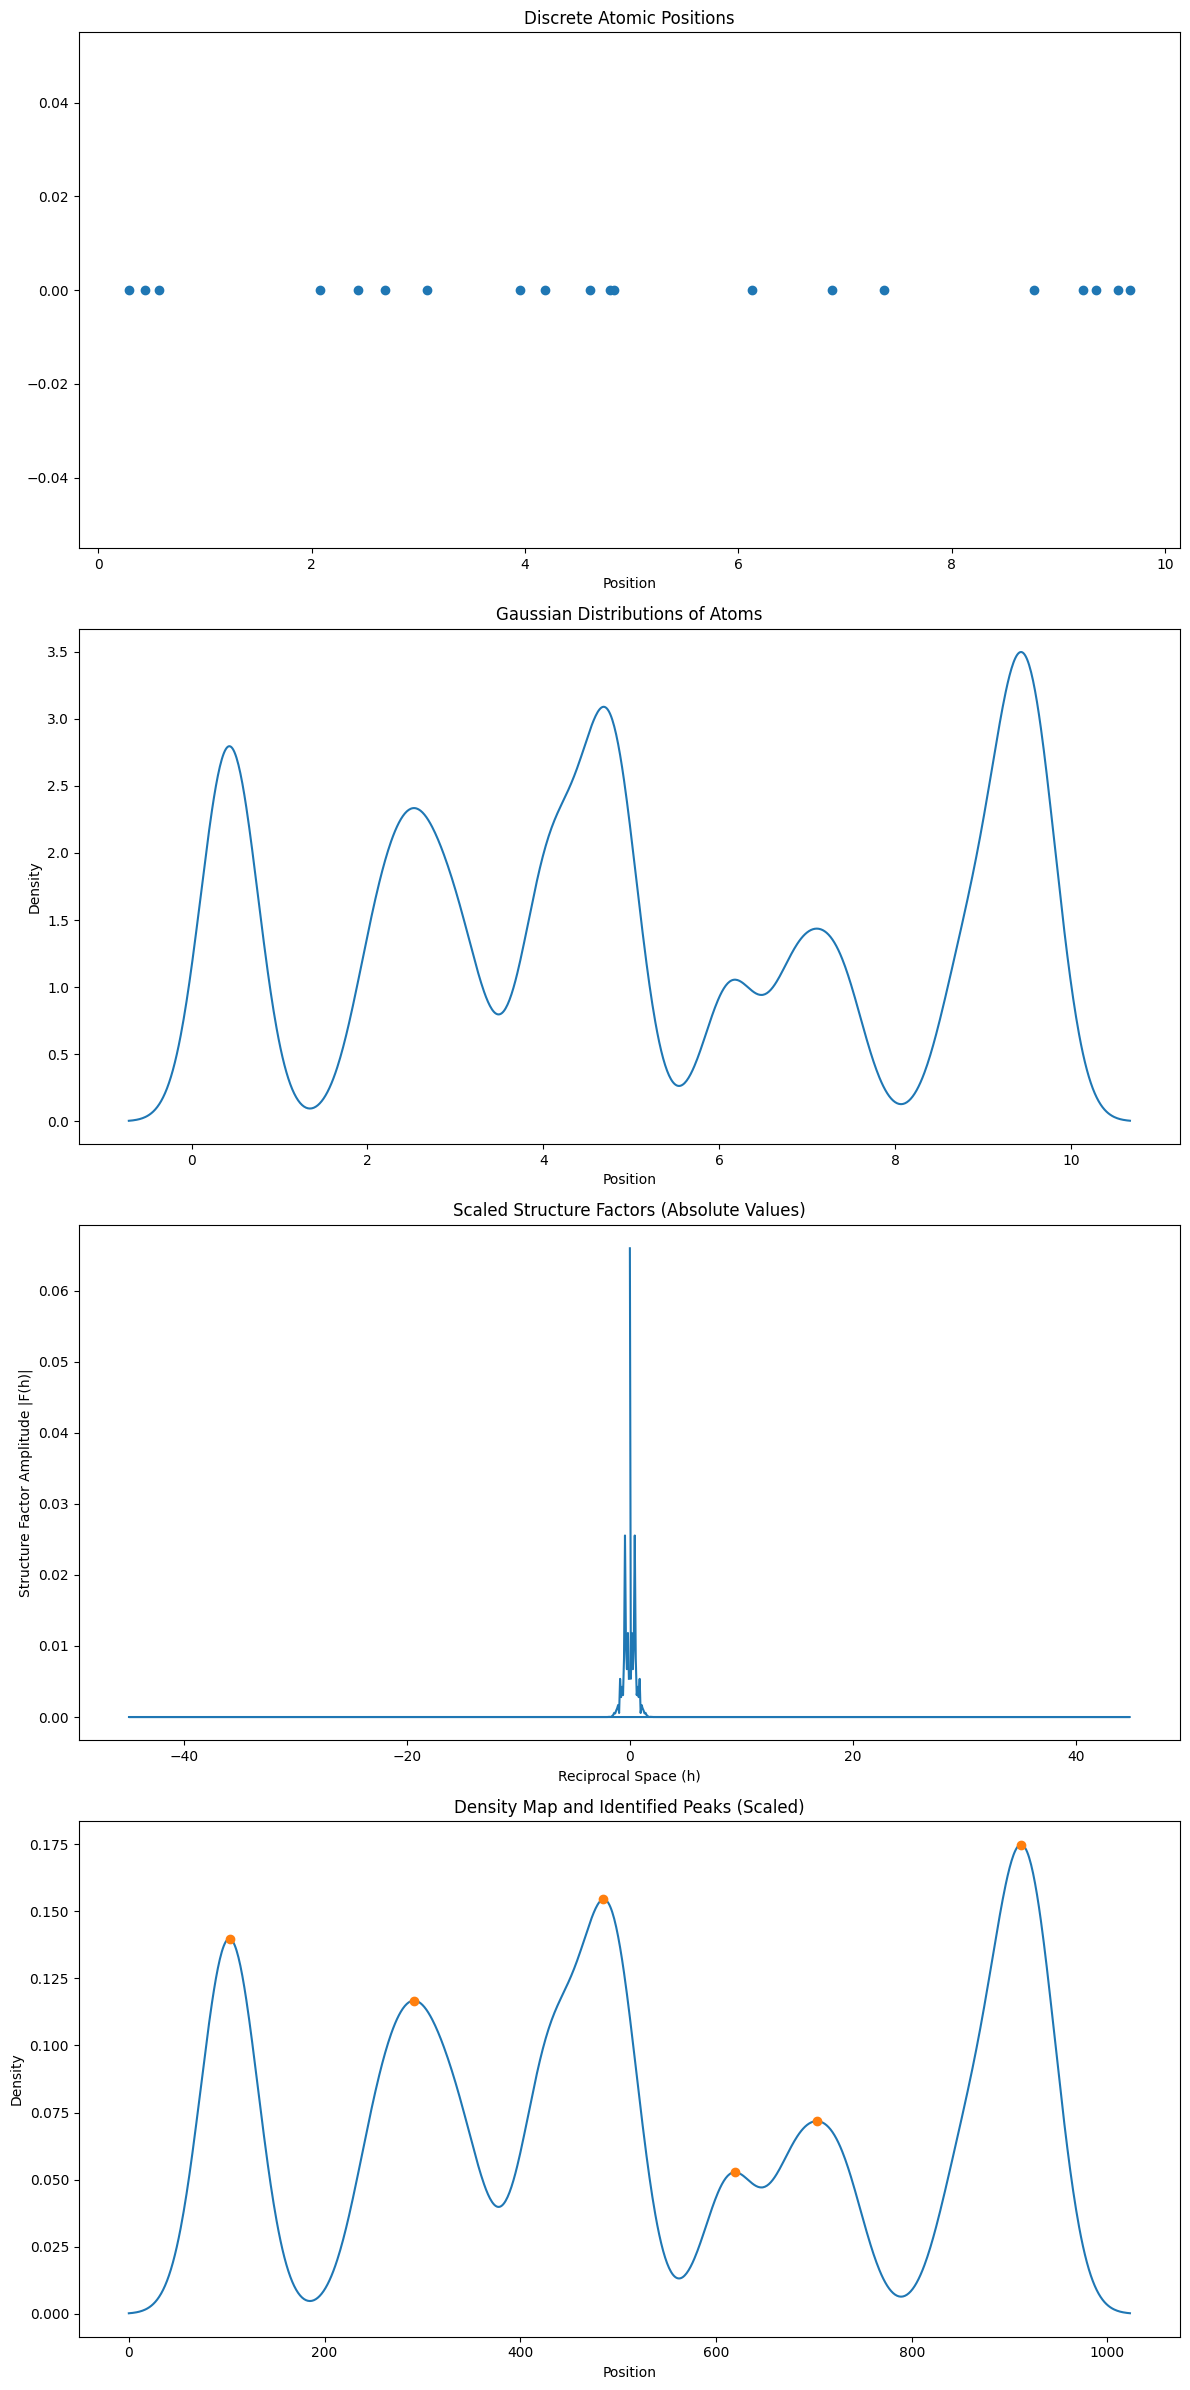

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft, ifft

#### INPUT ####
# Set the number of atoms
num_atoms = 20
# Generate random atomic positions for the specified number of atoms
atomic_positions = np.sort(np.random.rand(num_atoms) * 10)
###############

#Convert atoms into gaussians with specified sigma
def gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

N = 1024
sigma = 0.3
x_range = np.linspace(min(atomic_positions) - 1, max(atomic_positions) + 1, N)
h = np.fft.fftfreq(N, d=(max(x_range) - min(x_range)) / N)
atom_distributions = np.zeros(N)
for pos in atomic_positions:
    atom_distributions += gaussian(x_range, pos, sigma)

#Scale for the structure factor by 1/num_atoms is normalisation ??
scale_factor = 1 / num_atoms
F_h_gaussian = ifft(atom_distributions, N) 
F_h_scaled = F_h_gaussian * scale_factor

rho_x_scaled = fft(F_h_scaled, N)

peaks_scaled, _ = find_peaks(np.real(rho_x_scaled))

# Adjusting the plots to be below each other with aspect ratio width:height of 2:1
plt.figure(figsize=(12, 24))

plt.subplot(4, 1, 1)
plt.scatter(atomic_positions, [0] * atomic_positions.shape[0])
plt.title('Discrete Atomic Positions')
plt.xlabel('Position')
plt.grid(False)

plt.subplot(4, 1, 2)
plt.plot(x_range, atom_distributions)
plt.title('Gaussian Distributions of Atoms')
plt.xlabel('Position')
plt.ylabel('Density')
plt.grid(False)

plt.subplot(4, 1, 3)
plt.plot(h, np.abs(F_h_scaled))
plt.title('Scaled Structure Factors (Absolute Values)')
plt.xlabel('Reciprocal Space (h)')
plt.ylabel('Structure Factor Amplitude |F(h)|')
plt.grid(False)

plt.subplot(4, 1, 4)
plt.plot(np.real(rho_x_scaled))
plt.plot(peaks_scaled, np.real(rho_x_scaled)[peaks_scaled], "o")
plt.title('Density Map and Identified Peaks (Scaled)')
plt.xlabel('Position')
plt.ylabel('Density')
plt.grid(False)

plt.tight_layout()
plt.show()


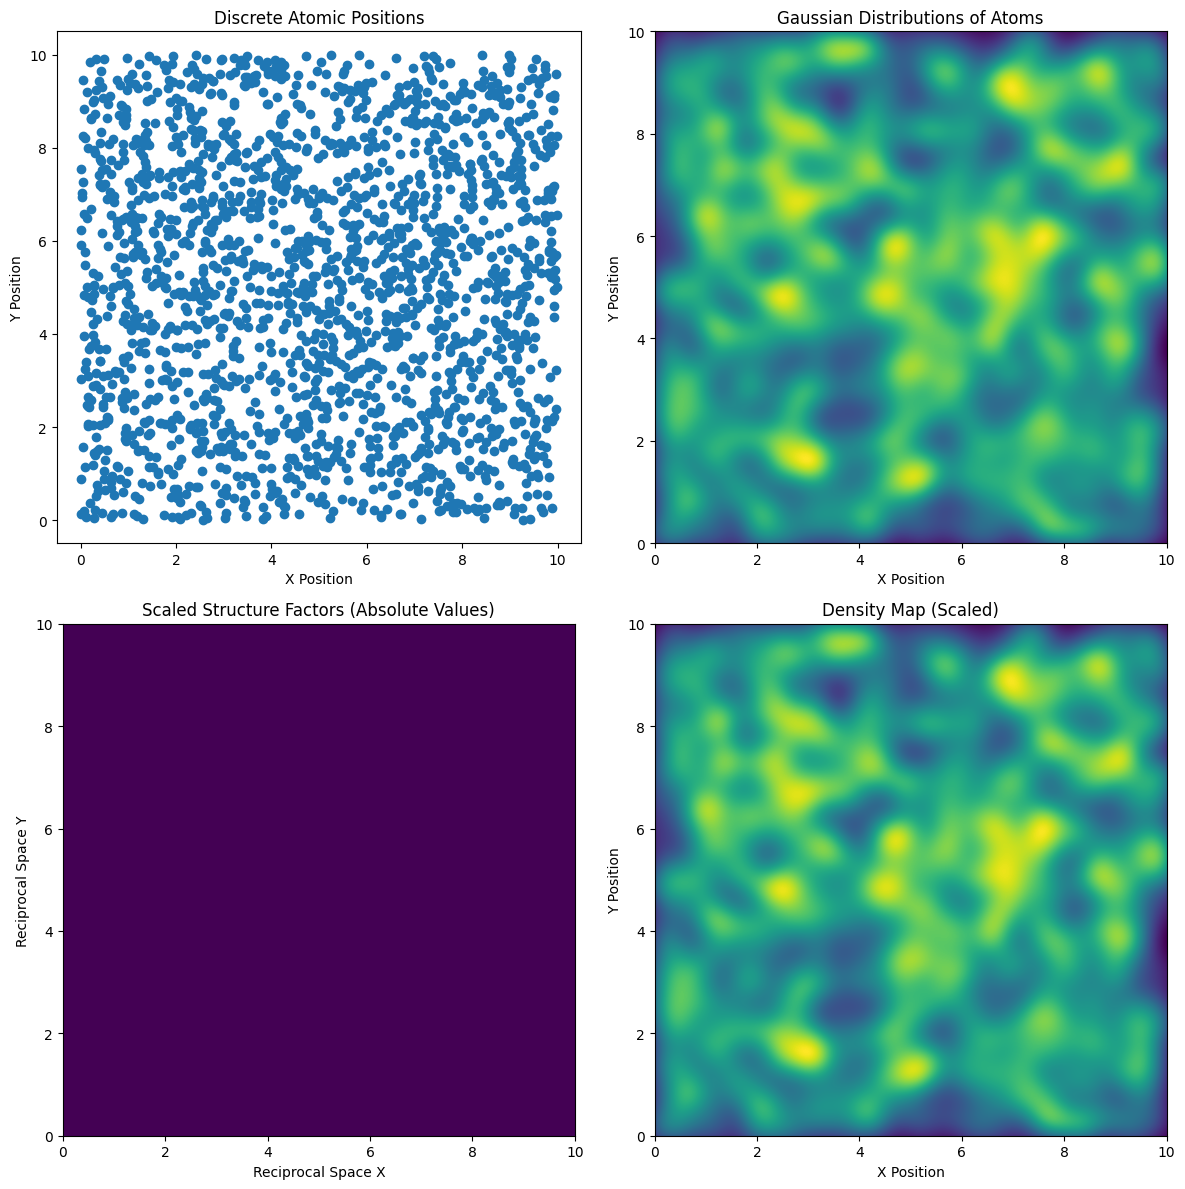

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2

# Define a 2D Gaussian function
def gaussian_2d(x, y, mu_x, mu_y, sigma):
    return np.exp(-((x - mu_x)**2 + (y - mu_y)**2) / (2 * sigma**2))

# Generate 2D atomic positions
num_atoms = 2000
atomic_positions_x = np.random.rand(num_atoms) * 10
atomic_positions_y = np.random.rand(num_atoms) * 10

# Set up the 2D space
N = 1024
sigma = 0.3
x_range = np.linspace(0, 10, N)
y_range = np.linspace(0, 10, N)
x, y = np.meshgrid(x_range, y_range)

# Generate 2D Gaussian distributions for each atom
atom_distributions_2d = np.zeros((N, N))
for pos_x, pos_y in zip(atomic_positions_x, atomic_positions_y):
    atom_distributions_2d += gaussian_2d(x, y, pos_x, pos_y, sigma)

# Compute 2D Structure Factors using 2D Inverse FFT
F_h_gaussian_2d = ifft2(atom_distributions_2d)

# Scale Structure Factor Amplitude by 1/num_of_atoms
scale_factor = 1 / num_atoms
F_h_scaled_2d = F_h_gaussian_2d * scale_factor

# Convert Scaled MTZ to MAP using 2D FFT
rho_x_scaled_2d = fft2(F_h_scaled_2d)

# Visualize the results in 2D
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot discrete atomic positions
axs[0, 0].scatter(atomic_positions_x, atomic_positions_y)
axs[0, 0].set_title('Discrete Atomic Positions')
axs[0, 0].set_xlabel('X Position')
axs[0, 0].set_ylabel('Y Position')

# Plot Gaussian atomic distributions
axs[0, 1].imshow(atom_distributions_2d, extent=(0, 10, 0, 10), origin='lower')
axs[0, 1].set_title('Gaussian Distributions of Atoms')
axs[0, 1].set_xlabel('X Position')
axs[0, 1].set_ylabel('Y Position')

# Plot scaled structure factors
axs[1, 0].imshow(np.abs(F_h_scaled_2d), extent=(0, 10, 0, 10), origin='lower')
axs[1, 0].set_title('Scaled Structure Factors (Absolute Values)')
axs[1, 0].set_xlabel('Reciprocal Space X')
axs[1, 0].set_ylabel('Reciprocal Space Y')

# Plot spatial density map
axs[1, 1].imshow(np.real(rho_x_scaled_2d), extent=(0, 10, 0, 10), origin='lower')
axs[1, 1].set_title('Density Map (Scaled)')
axs[1, 1].set_xlabel('X Position')
axs[1, 1].set_ylabel('Y Position')

plt.tight_layout()
plt.show()



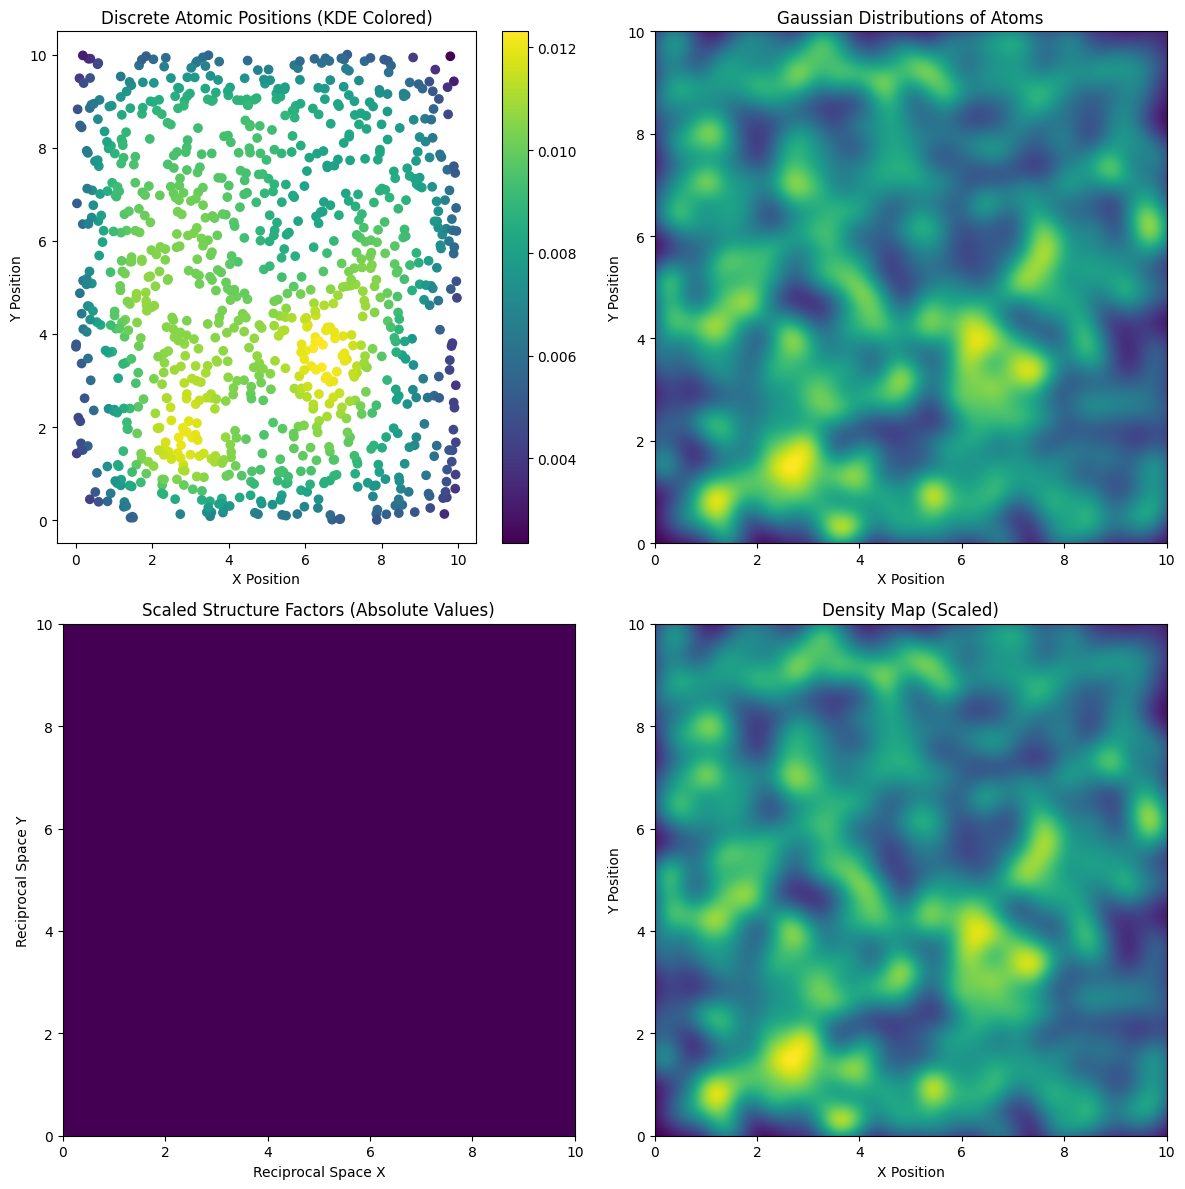

In [60]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2

# Define a 2D Gaussian function
def gaussian_2d(x, y, mu_x, mu_y, sigma):
    return np.exp(-((x - mu_x)**2 + (y - mu_y)**2) / (2 * sigma**2))

# Generate 2D atomic positions
num_atoms = 1000
atomic_positions_x = np.random.rand(num_atoms) * 10
atomic_positions_y = np.random.rand(num_atoms) * 10

# Set up the 2D space
N = 1024
sigma = 0.3
x_range = np.linspace(0, 10, N)
y_range = np.linspace(0, 10, N)
x, y = np.meshgrid(x_range, y_range)

# Generate 2D Gaussian distributions for each atom
atom_distributions_2d = np.zeros((N, N))
for pos_x, pos_y in zip(atomic_positions_x, atomic_positions_y):
    atom_distributions_2d += gaussian_2d(x, y, pos_x, pos_y, sigma)

# Compute 2D Structure Factors using 2D Inverse FFT
F_h_gaussian_2d = ifft2(atom_distributions_2d)

# Scale Structure Factor Amplitude by 1/num_of_atoms
scale_factor = 1 / num_atoms
F_h_scaled_2d = F_h_gaussian_2d * scale_factor

# Convert Scaled MTZ to MAP using 2D FFT
rho_x_scaled_2d = fft2(F_h_scaled_2d)

# Compute 2D Kernel Density Estimate
kde = gaussian_kde([atomic_positions_x, atomic_positions_y])
density = kde([atomic_positions_x, atomic_positions_y])

# Visualize the results with KDE-based coloring
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot discrete atomic positions with KDE-based coloring
scatter = axs[0, 0].scatter(atomic_positions_x, atomic_positions_y, c=density, cmap='viridis')
fig.colorbar(scatter, ax=axs[0, 0])
axs[0, 0].set_title('Discrete Atomic Positions (KDE Colored)')
axs[0, 0].set_xlabel('X Position')
axs[0, 0].set_ylabel('Y Position')

# Plot Gaussian atomic distributions
axs[0, 1].imshow(atom_distributions_2d, extent=(0, 10, 0, 10), origin='lower')
axs[0, 1].set_title('Gaussian Distributions of Atoms')
axs[0, 1].set_xlabel('X Position')
axs[0, 1].set_ylabel('Y Position')

# Plot scaled structure factors
axs[1, 0].imshow(np.abs(F_h_scaled_2d), extent=(0, 10, 0, 10), origin='lower')
axs[1, 0].set_title('Scaled Structure Factors (Absolute Values)')
axs[1, 0].set_xlabel('Reciprocal Space X')
axs[1, 0].set_ylabel('Reciprocal Space Y')

# Plot spatial density map
axs[1, 1].imshow(np.real(rho_x_scaled_2d), extent=(0, 10, 0, 10), origin='lower')
axs[1, 1].set_title('Density Map (Scaled)')
axs[1, 1].set_xlabel('X Position')
axs[1, 1].set_ylabel('Y Position')

plt.tight_layout()
plt.show()

